In [31]:
# Modelowanie ARIMA

import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd 
from datetime import datetime

In [32]:
# Wczytanie danych
customers = pd.read_csv('customers.csv', sep=";")
orders = pd.read_csv('orders.csv', sep=";", encoding="ISO-8859-1")

In [33]:
mergedOC = orders.merge(customers, on="customerid")

In [34]:
mergedOC.head(n=10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname
0,1002854,45978,2141,2009-10-13 00:00,NEWTON,MA,2459,VI,190.00,3,3,18991234,M,LOUIS
1,1002855,125381,2173,2009-10-13 00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848,M,ANTHONY
2,1002856,103122,2141,2011-06-02 00:00,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL
3,1002857,130980,2173,2009-10-14 00:00,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923,F,MARIA
4,1002886,48553,2141,2010-11-19 00:00,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.
5,1002887,106150,2173,2009-10-15 00:00,ROWAYTON,CT,6853,AE,10.00,1,1,36185316,M,CRAIG
6,1002888,27805,2173,2009-10-15 00:00,INDIANAPOLIS,IN,46240,VI,10.00,1,1,18368062,F,SUSAN
7,1002889,24546,2173,2009-10-15 00:00,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923,M,JOE
8,1002890,43783,2173,2009-10-15 00:00,EAST STROUDSBURG,PA,18301,DB,29.68,2,2,19130968,M,ROBERT
9,1003004,15688,2173,2009-10-15 00:00,ROUND LAKE PARK,IL,60073,DB,19.68,1,1,20542726,M,BILL


In [35]:
import datetime as dt
mergedOC['orderdate'] = pd.to_datetime(mergedOC['orderdate'])
mergedOC['year'] = mergedOC['orderdate'].dt.year

In [36]:
# Usunięcie zduplikowanych linii. Zastosowanie funkcji drop_duplicates w celu usunięcia tych linii, które reprezentują już
#istniejące householdid, które wystąpiło w danym roku.

abc = mergedOC.drop_duplicates(['year','householdid'], keep = 'first')
abc.head(n=10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,year
0,1002854,45978,2141,2009-10-13,NEWTON,MA,2459,VI,190.00,3,3,18991234,M,LOUIS,2009
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848,M,ANTHONY,2009
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2,36204911,NaN,MERRILL,2011
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923,F,MARIA,2009
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1,19227025,NaN,T.,2010
5,1002887,106150,2173,2009-10-15,ROWAYTON,CT,6853,AE,10.00,1,1,36185316,M,CRAIG,2009
6,1002888,27805,2173,2009-10-15,INDIANAPOLIS,IN,46240,VI,10.00,1,1,18368062,F,SUSAN,2009
7,1002889,24546,2173,2009-10-15,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923,M,JOE,2009
8,1002890,43783,2173,2009-10-15,EAST STROUDSBURG,PA,18301,DB,29.68,2,2,19130968,M,ROBERT,2009
9,1003004,15688,2173,2009-10-15,ROUND LAKE PARK,IL,60073,DB,19.68,1,1,20542726,M,BILL,2009


In [37]:
# Pogrupowanie zamówień według daty. Wynik przedstawia jak wiele gospodarstw zamawiało produkty każdego dnia (wartość skumulowana)
mergedOC3=abc.groupby(['orderdate']).size().reset_index(name='TotalNumberOfCustomers')
mergedOC3.head(n=20)

,orderdate,TotalNumberOfCustomers
0,2009-10-04,171
1,2009-10-05,137
2,2009-10-06,83
3,2009-10-07,55
4,2009-10-08,33
5,2009-10-09,36
6,2009-10-10,23
7,2009-10-11,2
8,2009-10-12,14
9,2009-10-13,18


In [38]:
# Posortowanie zamówień według daty a następnie po kolumnie 'householdid'
abc3 = abc.sort_values(['orderdate', 'householdid'], ascending=[True, False])
# Pozostawienie tylko tych linii, które jako pierwsze przedstawiają zakup przez dane 'householdid'
abc3 = abc3.drop_duplicates(['householdid'], keep = "first")
abc3.head(n=10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname,year
2983,1000088,24996,2141,2009-10-04,VALLEY STREAM,NY,11580,VI,20.0,1,2,76559786,M,PHILIP,2009
3294,1000314,106958,2173,2009-10-04,OAKLAND,CA,94611,MC,10.0,1,1,51538797,M,JEFFREY,2009
3398,1000532,7030,2141,2009-10-04,TENAFLY,NJ,7670,MC,10.0,1,1,48803304,NaN,WYNNE,2009
3435,1000582,113419,2173,2009-10-04,NEW YORK,NY,10016,VI,20.0,1,2,36216447,M,PAUL,2009
2976,1000290,111116,2173,2009-10-04,ST LOUIS,MO,63105,MC,10.0,1,1,36216359,M,MARTIN,2009
3462,1000492,108534,2204,2009-10-04,BOONE,NC,28607,VI,10.0,1,1,36212714,M,PETER,2009
3328,1000352,108671,2173,2009-10-04,NEW YORK,NY,10019,AE,10.0,1,1,36212713,M,BERT,2009
3015,1000267,122822,2173,2009-10-04,NY,NY,10012,VI,10.0,1,1,36212304,F,GENNIFER,2009
3466,1000501,112050,2173,2009-10-04,NEW YORK,NY,10016,VI,20.0,1,2,36212106,F,DARCY,2009
2952,1000161,98524,2173,2009-10-04,COURTLANDT MANOR,NY,10567,VI,10.0,1,1,36209433,M,ROSS,2009


In [39]:
# Wyświetlenie tabeli, obrazującej jak wiele unikatowych klientów dokonywało zakupu każdego dnia
mergedOC4=abc3.groupby(['orderdate']).size().reset_index(name='TotalNumberOfNewCustomers')
mergedOC4.head(n=20)

,orderdate,TotalNumberOfNewCustomers
0,2009-10-04,171
1,2009-10-05,137
2,2009-10-06,83
3,2009-10-07,55
4,2009-10-08,33
5,2009-10-09,36
6,2009-10-10,23
7,2009-10-11,2
8,2009-10-12,14
9,2009-10-13,18


(array([   0,    1,    2, ..., 2538, 2539, 2540]),
 <a list of 2541 Text xticklabel objects>)

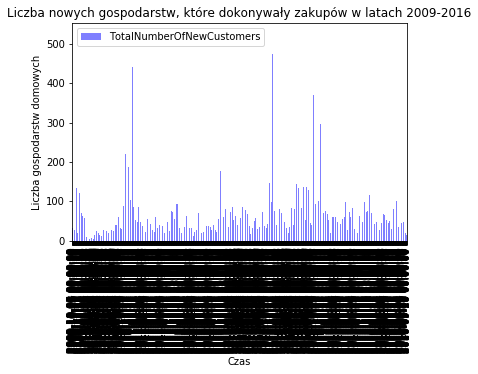

In [40]:
# Przedstawienie na wykresie zróżnicowania klientów z roku na rok
%matplotlib inline 
mergedOC4.plot.bar('orderdate','TotalNumberOfNewCustomers', alpha=.5, color='blue')

# Ustawienie nazw osi oraz tytułu:

plt.title("Liczba nowych gospodarstw, które dokonywały zakupów w latach 2009-2016")
plt.ylabel('Liczba gospodarstw domowych')
plt.xlabel('Czas')
plt.xticks(rotation=90)

In [41]:
#Usunięcie danych dt roku 2016, który będziemy chcieli zaprognozować.
mergedOC4['orderdate'] = pd.to_datetime(mergedOC4['orderdate'])

In [42]:
# Ustawienie daty pierwszego i ostatniego rekordu 
start_date = '03-10-2009'
end_date = '31-12-2015'

In [43]:
mask = (mergedOC4['orderdate'] > start_date) & (mergedOC4['orderdate'] <= end_date)

In [44]:
#Wyświetlenie ograniczonych czasowo danych
mergedOC5 = mergedOC4.loc[mask]
mergedOC5.head(n=20)

,orderdate,TotalNumberOfNewCustomers
0,2009-10-04,171
1,2009-10-05,137
2,2009-10-06,83
3,2009-10-07,55
4,2009-10-08,33
5,2009-10-09,36
6,2009-10-10,23
7,2009-10-11,2
8,2009-10-12,14
9,2009-10-13,18


In [45]:
#Sprawdzenie typów zmiennych, które będą wymagane do użycia w szeregu czasowym
mergedOC5.dtypes

orderdate                    datetime64[ns]
TotalNumberOfNewCustomers             int64
dtype: object

In [46]:
#Zamiana na szereg czasowy
series1 = pd.Series(mergedOC5['TotalNumberOfNewCustomers'].values, index=mergedOC5['orderdate'])
series1

orderdate
2009-10-04    171
2009-10-05    137
2009-10-06     83
2009-10-07     55
2009-10-08     33
2009-10-09     36
2009-10-10     23
2009-10-11      2
2009-10-12     14
2009-10-13     18
2009-10-14     11
2009-10-15    106
2009-10-16     83
2009-10-17     31
2009-10-18     10
2009-10-19     53
2009-10-20     33
2009-10-21     62
2009-10-22     61
2009-10-23     27
2009-10-24     25
2009-10-25     72
2009-10-26     83
2009-10-27     47
2009-10-28    386
2009-10-29     69
2009-10-30     38
2009-10-31    213
2009-11-01     14
2009-11-02     90
             ... 
2015-12-02    246
2015-12-03    185
2015-12-04    175
2015-12-05    161
2015-12-06    286
2015-12-07    241
2015-12-08    185
2015-12-09    178
2015-12-10    136
2015-12-11    139
2015-12-12    116
2015-12-13    206
2015-12-14    174
2015-12-15    142
2015-12-16    116
2015-12-17    109
2015-12-18     60
2015-12-19     55
2015-12-20    115
2015-12-21    104
2015-12-22     78
2015-12-23     47
2015-12-24     25
2015-12-25     17


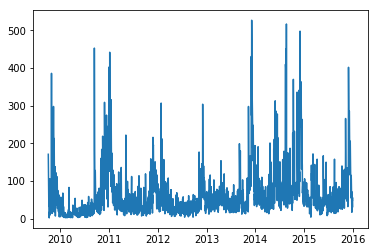

In [47]:
#Przedstawienie szeregu czasowego na wykresie
%matplotlib inline 
plt.plot(series1)

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
   
    #Ustalenie średniej kroczącej i odchylenia standardowego
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Narysowanie wskaźników statystycznych na wykresie
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Średnia krocząca i odchylenie standardowe')
    plt.show(block=False)
    
    #Przeprowadzenie testu Dickey-Fullera :
    print('Wyniki testu Dickey-Fullera :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


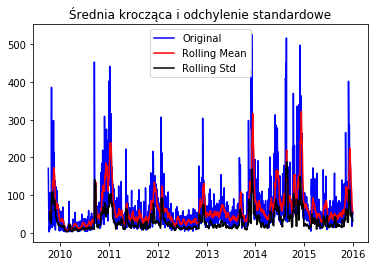

Wyniki testu Dickey-Fullera :
Test Statistic                   -4.873002
p-value                           0.000039
#Lags Used                       27.000000
Number of Observations Used    2250.000000
Critical Value (1%)              -3.433260
Critical Value (5%)              -2.862825
Critical Value (10%)             -2.567454
dtype: float64


In [49]:
#Zobrazowanie wyników przeprowadzonego testu Ducker Fullera, który umożliwia ustalenie stacjonarności szeregu
# i pomagającego określić czy jest potrzebne wygładzanie i usunięcie sezonowości szeregu.
%matplotlib inline 
test_stationarity(series1)

In [50]:
# Z powyższych statystyk wynika, że: p-value jest bardzo niskie - 0,39% i jest mniejsze od poziomu isto
# tności <0,05 co wskazuje na to, że model jest stacjonarny.
#Wartości krytyczne dla 1% i 5% wskazują zgodnie z tablicami, że wykres również wykazuje się brakiem trendu.
#To z kolei świadczy o tym , że nie jest konieczne wygładzanie i usuwanie domniemanej sezonowości.
#http://www.economicissues.org.uk/Files/2001/201cCook.pdf strona 4

In [51]:
# Zaimportowanie biblioteki umożliwiającej wykonanie testu ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [52]:
#Zamiana nazw zmiennych
df=mergedOC5

#Określenie stosunku ilościowego danych treningowych do testowych.
train=df[0:1800] 
test=df[1800:]

#Zagregowanie danych
df.Timestamp = pd.to_datetime(df.orderdate,format='%d-%m-%Y') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.orderdate,format='%d-%m-%Y') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.orderdate,format='%d-%m-%Y') 
test.index = test.Timestamp 
test = test.resample('D').mean()

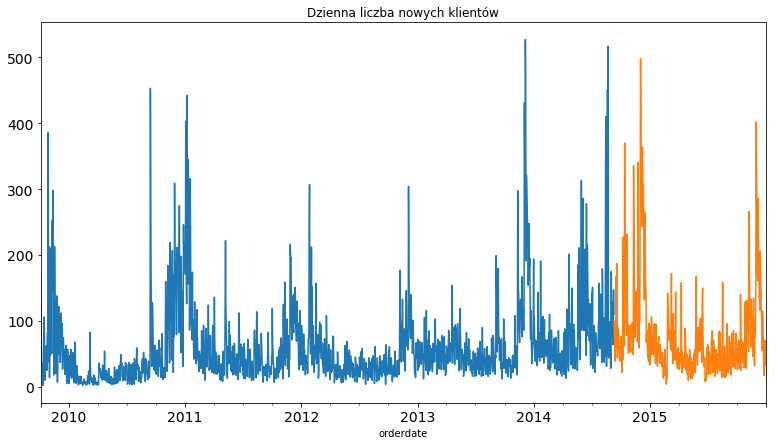

In [53]:
#Narysowanie wykresu pokazującego podział na dane treningowe i testowe z uwzględnieniem konkretnych kolorów.
train.TotalNumberOfNewCustomers.plot(figsize=(13,7), title= 'Dzienna liczba nowych klientów', fontsize=14)
test.TotalNumberOfNewCustomers.plot(figsize=(13,7), title= 'Dzienna liczba nowych klientów', fontsize=14)
plt.show()

Observations: 2278
Training Observations: 1936
Testing Observations: 342


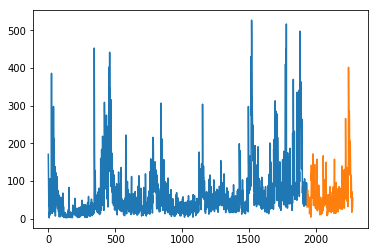

In [56]:
#Ustawienie stosunku danych treningowych do testowych 85:10
#Narysowanie wykresu przedstawiającego treningowe i testowe dane
from matplotlib import pyplot
X = series1.values
train_size = int(len(X) * 0.85)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Observations: 1140
Training Observations: 571
Testing Observations: 569
Observations: 1709
Training Observations: 1140
Testing Observations: 569
Observations: 2278
Training Observations: 1709
Testing Observations: 569


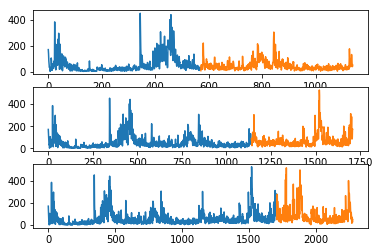

In [57]:
#Porównanie wyników w przypadków zmniejszenia bądź zwiększenia danych treningowych/testowych.
X = series1.values
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

In [58]:
#Pobranie biblioteki umożliwiającej narysowanie wykresów autokorelacji i autokorelacji częściowej:
from statsmodels.tsa.stattools import acf, pacf

In [59]:
ts_log = np.log(series1)
ts_log_diff = ts_log - ts_log.shift()

f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
f:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


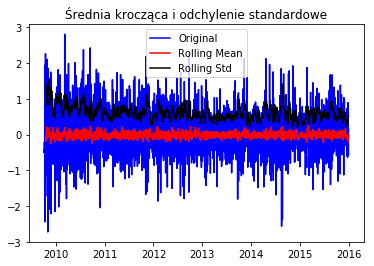

Wyniki testu Dickey-Fullera :
Test Statistic                -1.248335e+01
p-value                        3.056725e-23
#Lags Used                     2.700000e+01
Number of Observations Used    2.249000e+03
Critical Value (1%)           -3.433261e+00
Critical Value (5%)           -2.862826e+00
Critical Value (10%)          -2.567455e+00
dtype: float64


In [60]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [62]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

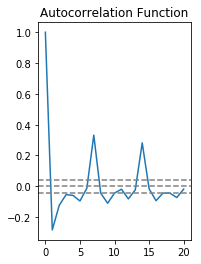

In [63]:
#Narysowanie wykresu autokorelacji. Zmierzenie wskaźników potrzebnych do modelu.
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

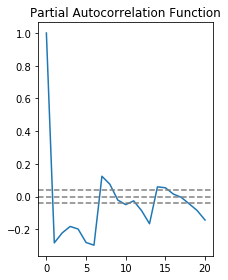

In [64]:
#Narysowanie wykresu częściowej autokorelacji. Zmierzenie wskaźników potrzebnych do modelu.
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [65]:
# Z powyższych wykresów wynika, ze w przypadku PACF linia przecina górną granicę 3 razy, tak więc p=3
# Dla ACF wskaźnik jest ten sam q=3

In [66]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 795.5391')

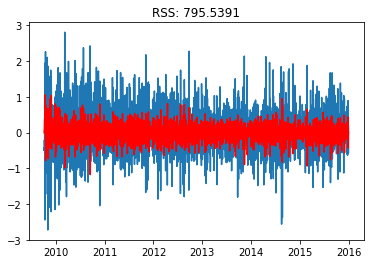

In [67]:
#Przedstawienie dopasowania modelu w przypadku wybrania wskaźnika p=3 i q=0.
model = ARIMA(ts_log, order=(3, 1, 0))  
results_AR = model.fit(disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 711.0063')

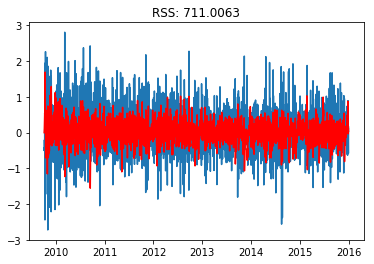

In [68]:
#Przedstawienie dopasowania modelu w przypadku wybrania wskaźnika p=0 i q=3.
model = ARIMA(ts_log, order=(0, 1, 3))  
results_MA = model.fit(disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'RSS: 663.4822')

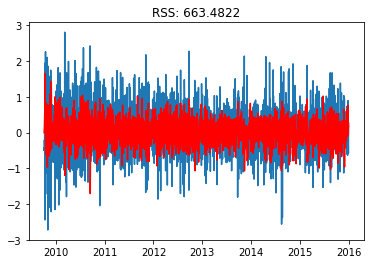

In [69]:
#Przedstawienie dopasowania modelu w przypadku wybrania wskaźnika p=3 i q=3.
model = ARIMA(ts_log, order=(3, 1, 3))  
results_ARIMA = model.fit(disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
#Model ARIMA wykasuje się najmniejszą wartością wskaźnika RSS, co doprowadza nas do wyboru obu wskaźników ('p','q') do modelu.

predicted=157.056384, expected=172.000000
predicted=134.382398, expected=209.000000
predicted=187.531575, expected=166.000000
predicted=179.571925, expected=134.000000
predicted=133.525660, expected=48.000000
predicted=89.144002, expected=278.000000
predicted=226.819497, expected=77.000000
predicted=112.251035, expected=216.000000
predicted=177.823174, expected=214.000000
predicted=185.637393, expected=162.000000
predicted=168.905855, expected=123.000000
predicted=145.137570, expected=133.000000
predicted=142.087653, expected=92.000000
predicted=123.363660, expected=119.000000
predicted=137.782195, expected=70.000000
predicted=103.196028, expected=94.000000
predicted=111.931302, expected=126.000000
predicted=128.434515, expected=56.000000
predicted=91.435961, expected=33.000000
predicted=76.732884, expected=36.000000
predicted=70.411373, expected=82.000000
predicted=85.999771, expected=72.000000
predicted=81.740414, expected=142.000000
predicted=119.638783, expected=79.000000
predicted

f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=76.046687, expected=62.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=67.757245, expected=93.000000
predicted=91.642980, expected=85.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=84.598871, expected=61.000000
predicted=67.271520, expected=22.000000
predicted=52.583429, expected=40.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=59.910091, expected=82.000000
predicted=69.259651, expected=59.000000
predicted=60.375457, expected=63.000000
predicted=72.437777, expected=63.000000
predicted=65.065815, expected=54.000000
predicted=53.488705, expected=58.000000
predicted=64.101506, expected=47.000000
predicted=60.086404, expected=66.000000
predicted=59.231418, expected=73.000000
predicted=63.905635, expected=98.000000
predicted=85.875674, expected=81.000000
predicted=75.247529, expected=157.000000
predicted=109.088178, expected=62.000000
predicted=71.713199, expected=58.000000
predicted=77.414866, expected=96.000000
predicted=82.753884, expected=136.000000
predicted=99.129751, expected=87.000000
predicted=92.920250, expected=141.000000
predicted=121.441981, expected=73.000000
predicted=74.212515, expected=37.000000
predicted=64.776989, expected=60.000000
predicted=81.686976, expected=179.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=123.111978, expected=148.000000
predicted=110.682765, expected=62.000000
predicted=95.092580, expected=77.000000
predicted=94.694066, expected=105.000000
predicted=82.970851, expected=39.000000
predicted=65.847481, expected=37.000000
predicted=80.522746, expected=75.000000
predicted=70.740179, expected=46.000000
predicted=47.072387, expected=52.000000
predicted=77.257381, expected=330.000000
predicted=206.757255, expected=410.000000
predicted=236.233659, expected=401.000000
predicted=288.288056, expected=31.000000
predicted=129.452909, expected=71.000000
predicted=114.458790, expected=110.000000
predicted=100.803933, expected=451.000000
predicted=305.741677, expected=137.000000
predicted=171.199118, expected=517.000000
predicted=342.594066, expected=48.000000
predicted=131.691951, expected=44.000000
predicted=153.871251, expected=62.000000
predicted=132.084167, expected=69.000000
predicted=94.443061, expected=51.000000
predicted=109.482908, expected=99.000000
predicted=142.38

f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=64.843003, expected=32.000000
predicted=94.328305, expected=175.000000
predicted=137.615208, expected=75.000000
predicted=67.924819, expected=82.000000
predicted=105.308467, expected=76.000000
predicted=108.475705, expected=129.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=93.773090, expected=64.000000
predicted=73.019719, expected=81.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=113.985595, expected=147.000000
predicted=118.722448, expected=110.000000
predicted=80.926129, expected=100.000000
predicted=113.920851, expected=83.000000
predicted=112.180288, expected=65.000000
predicted=64.749123, expected=39.000000
predicted=59.884617, expected=56.000000
predicted=95.172962, expected=75.000000
predicted=77.750040, expected=167.000000
predicted=100.278309, expected=61.000000
predicted=86.818133, expected=187.000000
predicted=154.287923, expected=71.000000
predicted=68.627511, expected=44.000000
predicted=66.521874, expected=49.000000
predicted=93.330114, expected=81.000000
predicted=79.807144, expected=89.000000
predicted=66.294428, expected=64.000000
predicted=87.107831, expected=59.000000
predicted=86.523930, expected=61.000000
predicted=53.230129, expected=40.000000
predicted=52.706696, expected=39.000000
predicted=76.475672, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=61.649445, expected=65.000000
predicted=46.753198, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=80.841552, expected=50.000000
predicted=72.793546, expected=66.000000
predicted=51.224264, expected=22.000000
predicted=38.074072, expected=29.000000
predicted=62.881319, expected=65.000000
predicted=58.321102, expected=41.000000
predicted=31.946549, expected=227.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=142.641346, expected=141.000000
predicted=114.979841, expected=84.000000
predicted=77.532897, expected=116.000000
predicted=97.531376, expected=62.000000
predicted=84.430577, expected=370.000000
predicted=215.447248, expected=223.000000
predicted=155.057096, expected=144.000000
predicted=154.199341, expected=135.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=150.035091, expected=174.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=138.859166, expected=87.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=113.097309, expected=78.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=129.966279, expected=130.000000
predicted=125.060885, expected=232.000000
predicted=156.532008, expected=104.000000
predicted=135.191123, expected=87.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=132.176276, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=89.305412, expected=51.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=80.609799, expected=83.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=119.973573, expected=92.000000
predicted=100.561087, expected=94.000000
predicted=81.232539, expected=92.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=108.098155, expected=67.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=101.624891, expected=53.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=62.957074, expected=55.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=67.060749, expected=53.000000
predicted=88.369600, expected=94.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=87.637515, expected=76.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=62.741725, expected=97.000000
predicted=97.063066, expected=97.000000
predicted=103.131396, expected=89.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=74.685108, expected=78.000000
predicted=76.276951, expected=49.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=84.197142, expected=336.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=196.762597, expected=249.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=155.768043, expected=181.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=168.092014, expected=142.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=158.073034, expected=116.000000
predicted=110.877457, expected=74.000000
predicted=100.051462, expected=94.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=134.182301, expected=144.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=130.516864, expected=111.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=98.525475, expected=127.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=137.901897, expected=101.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=128.214864, expected=147.000000
predicted=115.921792, expected=68.000000
predicted=91.545993, expected=91.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=126.921304, expected=341.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=214.936704, expected=169.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=131.095344, expected=123.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=155.058789, expected=59.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=122.203543, expected=125.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=105.634237, expected=98.000000
predicted=108.783080, expected=153.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=165.785727, expected=355.000000
predicted=227.958959, expected=498.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=292.254755, expected=402.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=315.656685, expected=312.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=293.443371, expected=296.000000
predicted=245.702151, expected=243.000000
predicted=234.164071, expected=263.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=283.946088, expected=364.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=305.201286, expected=301.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=255.180735, expected=268.000000
predicted=285.784973, expected=307.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=310.949350, expected=249.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=238.424343, expected=166.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=212.465374, expected=132.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=226.394721, expected=217.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=225.175356, expected=264.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=221.768281, expected=197.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=235.743729, expected=157.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=220.574903, expected=141.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=160.433891, expected=68.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=131.755421, expected=81.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=168.859842, expected=86.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=130.940510, expected=62.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=87.303401, expected=57.000000
predicted=120.041449, expected=45.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=111.863307, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=77.720172, expected=38.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=67.377622, expected=71.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=115.704033, expected=97.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=95.677290, expected=67.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=57.656215, expected=81.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=102.567771, expected=33.000000
predicted=80.982126, expected=92.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=66.978179, expected=49.000000
predicted=57.205507, expected=68.000000
predicted=99.048985, expected=106.000000
predicted=89.749317, expected=104.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=68.633051, expected=72.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=91.308847, expected=68.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=94.420737, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=58.897901, expected=48.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=54.922163, expected=50.000000
predicted=87.105844, expected=75.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=71.955866, expected=85.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=55.403877, expected=96.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=96.170096, expected=66.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=89.031761, expected=56.000000
predicted=48.596510, expected=44.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=49.705511, expected=35.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=72.761781, expected=77.000000
predicted=69.883203, expected=95.000000
predicted=59.284571, expected=72.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=79.937110, expected=63.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=83.402100, expected=40.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=39.175754, expected=31.000000
predicted=39.285631, expected=38.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=67.970115, expected=65.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=60.849919, expected=68.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=44.034706, expected=76.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=75.548681, expected=57.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=73.844189, expected=56.000000
predicted=45.264080, expected=43.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=43.678640, expected=35.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=63.048403, expected=64.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=59.865787, expected=55.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.497160, expected=53.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=61.173745, expected=39.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=60.495845, expected=50.000000
predicted=39.557453, expected=31.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=33.952233, expected=39.000000
predicted=59.441103, expected=52.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=50.573989, expected=43.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=30.476091, expected=14.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.130675, expected=13.000000
predicted=40.580337, expected=20.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=17.847881, expected=17.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18.938719, expected=26.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=43.548544, expected=57.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=44.984553, expected=34.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=20.127315, expected=37.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=42.268808, expected=19.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.510045, expected=10.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11.377665, expected=4.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10.781197, expected=9.000000
predicted=30.015929, expected=11.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=17.524061, expected=72.000000
predicted=34.272362, expected=142.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=88.105980, expected=101.000000
predicted=81.574918, expected=121.000000
predicted=81.568844, expected=98.000000
predicted=74.166399, expected=91.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=88.094277, expected=70.000000
predicted=73.390460, expected=87.000000
predicted=70.393487, expected=77.000000
predicted=75.952214, expected=82.000000
predicted=86.256468, expected=60.000000
predicted=63.340850, expected=56.000000
predicted=59.039181, expected=98.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=90.586419, expected=172.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=124.158037, expected=55.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=63.411891, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=86.132294, expected=61.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=77.061787, expected=35.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=50.333422, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=65.425416, expected=111.000000
predicted=97.391482, expected=46.000000
predicted=58.793709, expected=85.000000
predicted=75.649591, expected=42.000000
predicted=61.339077, expected=75.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=75.068746, expected=41.000000
predicted=50.870786, expected=44.000000
predicted=55.487373, expected=144.000000
predicted=107.264027, expected=57.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=61.327847, expected=44.000000
predicted=58.833841, expected=53.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=64.978750, expected=35.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=47.746211, expected=35.000000
predicted=45.833644, expected=28.000000
predicted=46.540345, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=57.406844, expected=43.000000
predicted=43.869904, expected=37.000000
predicted=46.564076, expected=42.000000
predicted=50.040037, expected=35.000000
predicted=38.557447, expected=26.000000
predicted=34.571622, expected=30.000000
predicted=41.371069, expected=52.000000
predicted=46.655721, expected=46.000000
predicted=39.920031, expected=38.000000
predicted=43.242685, expected=37.000000
predicted=43.585223, expected=158.000000
predicted=95.483387, expected=34.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=41.727867, expected=21.000000
predicted=47.633932, expected=54.000000
predicted=52.969676, expected=47.000000
predicted=38.692319, expected=46.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=51.840304, expected=32.000000
predicted=49.020255, expected=32.000000
predicted=32.896584, expected=29.000000
predicted=32.075119, expected=41.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=50.218763, expected=51.000000
predicted=47.150876, expected=52.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=39.023619, expected=89.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=69.614313, expected=72.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=67.428155, expected=59.000000
predicted=51.562693, expected=27.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.942745, expected=25.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=44.949743, expected=50.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=48.434990, expected=41.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=36.975438, expected=19.000000
predicted=36.313061, expected=27.000000
predicted=40.771540, expected=21.000000
predicted=24.580344, expected=10.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=20.900330, expected=15.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=31.558518, expected=44.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=36.624270, expected=26.000000
predicted=21.851076, expected=57.000000
predicted=48.353922, expected=43.000000
predicted=43.567465, expected=47.000000
predicted=36.035775, expected=19.000000
predicted=26.602563, expected=12.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=30.540089, expected=44.000000
predicted=36.733754, expected=28.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=23.820967, expected=22.000000
predicted=31.783065, expected=39.000000
predicted=39.783213, expected=13.000000
predicted=15.994759, expected=29.000000
predicted=28.112983, expected=21.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=31.582294, expected=19.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.013043, expected=46.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=30.751309, expected=50.000000
predicted=42.734548, expected=48.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=43.924392, expected=56.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=40.652632, expected=25.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=29.648519, expected=21.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=34.431368, expected=67.000000
predicted=49.274601, expected=167.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=95.453593, expected=111.000000
predicted=85.188992, expected=102.000000
predicted=90.719106, expected=60.000000
predicted=61.120250, expected=38.000000
predicted=49.366728, expected=33.000000
predicted=54.966998, expected=66.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=64.102811, expected=90.000000
predicted=67.794855, expected=60.000000
predicted=63.897935, expected=70.000000
predicted=74.250329, expected=53.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=54.326291, expected=59.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=56.708208, expected=60.000000
predicted=67.553970, expected=96.000000
predicted=80.397890, expected=104.000000
predicted=77.914144, expected=55.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=65.594642, expected=82.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=83.483883, expected=73.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=66.645461, expected=37.000000
predicted=50.081598, expected=99.000000
predicted=90.863747, expected=133.000000
predicted=101.058656, expected=150.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=106.719109, expected=85.000000
predicted=91.924510, expected=53.000000
predicted=79.264587, expected=46.000000
predicted=58.725161, expected=32.000000
predicted=51.061341, expected=30.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=59.637296, expected=44.000000
predicted=55.605600, expected=37.000000
predicted=41.224536, expected=8.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.108742, expected=13.000000
predicted=39.961186, expected=17.000000
predicted=24.826589, expected=10.000000
predicted=21.539024, expected=17.000000
predicted=35.599098, expected=26.000000
predicted=30.438252, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.904923, expected=43.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=42.494394, expected=64.000000
predicted=58.318200, expected=54.000000
predicted=41.567421, expected=19.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=27.064458, expected=20.000000
predicted=38.474362, expected=34.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=35.606114, expected=53.000000
predicted=36.033748, expected=48.000000
predicted=46.498275, expected=41.000000
predicted=47.625763, expected=29.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=28.800400, expected=19.000000
predicted=24.886394, expected=31.000000
predicted=40.827165, expected=44.000000
predicted=39.662328, expected=72.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=46.481639, expected=39.000000
predicted=42.685463, expected=85.000000
predicted=69.877279, expected=50.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=42.209031, expected=22.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=32.028920, expected=61.000000
predicted=60.463624, expected=71.000000
predicted=56.896053, expected=68.000000
predicted=51.801893, expected=59.000000
predicted=60.613213, expected=51.000000
predicted=57.176262, expected=35.000000
predicted=37.506903, expected=16.000000
predicted=31.806968, expected=20.000000
predicted=40.103762, expected=52.000000
predicted=44.890834, expected=57.000000
predicted=43.087258, expected=39.000000
predicted=46.925112, expected=38.000000
predicted=46.203924, expected=30.000000
predicted=29.926457, expected=21.000000
predicted=29.526723, expected=20.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=36.650743, expected=50.000000
predicted=41.218682, expected=32.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=27.794202, expected=36.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=41.541419, expected=84.000000
predicted=64.677708, expected=63.000000
predicted=45.322945, expected=25.000000
predicted=35.578225, expected=24.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=42.209933, expected=83.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=57.917069, expected=62.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=46.178876, expected=25.000000
predicted=44.575518, expected=28.000000
predicted=41.998471, expected=36.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=29.665549, expected=14.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.894910, expected=15.000000
predicted=36.719967, expected=80.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=53.518247, expected=158.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=89.291791, expected=39.000000
predicted=54.465368, expected=27.000000
predicted=51.185379, expected=30.000000
predicted=30.676699, expected=21.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=29.078800, expected=15.000000
predicted=41.613668, expected=62.000000
predicted=50.974432, expected=39.000000
predicted=28.343576, expected=37.000000
predicted=45.749912, expected=14.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.465764, expected=28.000000
predicted=23.507320, expected=18.000000
predicted=21.690915, expected=18.000000
predicted=37.372087, expected=96.000000
predicted=63.624138, expected=60.000000
predicted=37.242571, expected=29.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=42.737269, expected=34.000000
predicted=48.005374, expected=26.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=22.256709, expected=21.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=24.613119, expected=34.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=47.464765, expected=48.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=40.600235, expected=77.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=44.983469, expected=46.000000
predicted=49.940051, expected=27.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=45.078734, expected=37.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=29.848786, expected=29.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=28.906706, expected=18.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=39.810839, expected=68.000000
predicted=52.544969, expected=48.000000
predicted=31.628286, expected=81.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=66.234392, expected=51.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=57.903157, expected=46.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.783198, expected=38.000000
predicted=37.748694, expected=30.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=47.988018, expected=85.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=64.706541, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=43.634862, expected=47.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=54.024799, expected=40.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=54.009918, expected=45.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.536551, expected=32.000000
predicted=35.353430, expected=27.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=47.021286, expected=62.000000
predicted=52.729550, expected=81.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=52.350541, expected=61.000000
predicted=60.094640, expected=42.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=56.440671, expected=47.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=41.389906, expected=26.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=32.491092, expected=26.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=46.620944, expected=58.000000
predicted=51.825986, expected=37.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=30.484110, expected=71.000000
predicted=61.987366, expected=48.000000
predicted=55.895283, expected=41.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=37.766934, expected=28.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=33.381858, expected=29.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=45.459764, expected=41.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=41.828824, expected=140.000000
predicted=81.848479, expected=92.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=75.053140, expected=25.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=52.482443, expected=73.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=60.887747, expected=36.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.597363, expected=40.000000
predicted=55.640896, expected=68.000000
predicted=65.016724, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=47.151446, expected=46.000000
predicted=51.247574, expected=50.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=62.297312, expected=66.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=54.991430, expected=29.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=34.400283, expected=42.000000
predicted=55.827068, expected=57.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=56.917857, expected=87.000000
predicted=58.567225, expected=129.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=92.956563, expected=43.000000
predicted=63.708519, expected=71.000000
predicted=64.995424, expected=28.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=38.117441, expected=112.000000
predicted=91.875839, expected=131.000000
predicted=101.325397, expected=102.000000
predicted=80.937806, expected=124.000000
predicted=103.104313, expected=98.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=98.269328, expected=78.000000
predicted=79.370186, expected=53.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=65.691233, expected=87.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=89.872981, expected=266.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=173.701456, expected=183.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=135.640838, expected=135.000000
predicted=133.280341, expected=103.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=120.328518, expected=105.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=103.313461, expected=60.000000
predicted=84.588106, expected=75.000000
predicted=102.983084, expected=133.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=116.898867, expected=107.000000
predicted=96.208090, expected=70.000000
predicted=96.110904, expected=77.000000
predicted=98.559171, expected=73.000000
predicted=75.378809, expected=46.000000
predicted=67.237159, expected=112.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=112.437226, expected=135.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=109.580405, expected=94.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=85.192717, expected=99.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=107.314584, expected=32.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=71.236151, expected=90.000000
predicted=79.241713, expected=75.000000
predicted=78.691894, expected=86.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=97.487640, expected=155.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=118.307751, expected=402.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=237.567034, expected=337.000000
predicted=240.609606, expected=246.000000
predicted=218.988055, expected=185.000000
predicted=176.386545, expected=175.000000
predicted=167.900707, expected=161.000000
predicted=177.163594, expected=286.000000
predicted=236.402278, expected=241.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=203.759415, expected=185.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=193.839518, expected=178.000000
predicted=199.750932, expected=136.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=156.863648, expected=139.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=154.072635, expected=116.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=157.641736, expected=206.000000
predicted=191.971877, expected=174.000000
predicted=161.042238, expected=142.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=161.991729, expected=116.000000
predicted=155.426828, expected=109.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=127.585798, expected=60.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=99.009969, expected=55.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=110.629748, expected=115.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=125.122277, expected=104.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=101.588150, expected=78.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=105.534137, expected=47.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=94.714285, expected=25.000000
predicted=56.829458, expected=17.000000
predicted=48.079125, expected=29.000000
predicted=68.505193, expected=71.000000
predicted=75.872968, expected=49.000000


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=48.914293, expected=47.000000
predicted=63.965985, expected=56.000000
predicted=73.009890, expected=32.000000
Test MSE: 2994.593


f:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


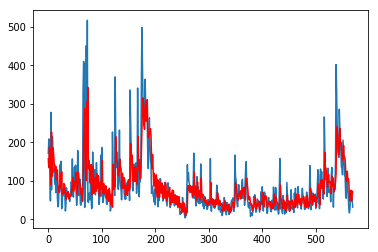

In [75]:
# Predykcja liczby nowych klientow na podstawie danych treningowych i stworzonego modelu
# z wybranymi wskaźnikami p, d, i q na 500 kolejnych dni.
from sklearn.metrics import mean_squared_error

X = series1.values
X = X.astype('float32')
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,3))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()